In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import sqlalchemy as sqdb
from sqlalchemy import create_engine
import mysql.connector as myconn

import pycountry

import gspread
from oauth2client.service_account import ServiceAccountCredentials

import keyring

## P R E U Z I M A Nj E
podataka uz pomoc **gitdir** komande

In [2]:
#!gitdir "https://github.com/fivethirtyeight/data/tree/master/primary-project-2022"

In [3]:
#!ls

****

## U C I T A V A Nj E

podataka uz pomoc **pandas** paketa

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
dem_c = pd.read_csv('primary-project-2022/dem_candidates.csv')
rep_c = pd.read_csv('primary-project-2022/rep_candidates.csv')

In [6]:
dem_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Candidate             1077 non-null   object
 1   Gender                1077 non-null   object
 2   Race 1                1077 non-null   object
 3   Race 2                30 non-null     object
 4   Race 3                1 non-null      object
 5   Incumbent             1077 non-null   object
 6   Incumbent Challenger  1077 non-null   object
 7   State                 1077 non-null   object
 8   Primary Date          1077 non-null   object
 9   Office                1077 non-null   object
 10  District              852 non-null    object
 11  Primary Votes         1076 non-null   object
 12  Primary %             1076 non-null   object
 13  Primary Outcome       1077 non-null   object
 14  Runoff Votes          24 non-null     object
 15  Runoff %              24 non-null     

In [7]:
rep_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Candidate             1599 non-null   object
 1   Gender                1599 non-null   object
 2   Race 1                1599 non-null   object
 3   Race 2                30 non-null     object
 4   Race 3                1 non-null      object
 5   Incumbent             1599 non-null   object
 6   Incumbent Challenger  1599 non-null   object
 7   State                 1599 non-null   object
 8   Primary Date          1599 non-null   object
 9   Office                1599 non-null   object
 10  District              1214 non-null   object
 11  Primary Votes         1592 non-null   object
 12  Primary %             1592 non-null   object
 13  Primary Outcome       1599 non-null   object
 14  Runoff Votes          39 non-null     object
 15  Runoff %              39 non-null     

****

## U P I S 
podataka uz pomoc **sqlalchemy** biblioteke

In [8]:
sql_psswd = keyring.get_password('mysql', 'aleksandar')
email_psswd = keyring.get_password('email', 'aleksandar')

engine = create_engine('mysql+mysqlconnector://aleksandar:%s@localhost:3306/developers_lab' %sql_psswd)

In [9]:
mydb = myconn.connect(
        host = 'localhost',
        username = 'aleksandar',
        port = '3306',
        password= sql_psswd,
        database='developers_lab'
)

In [10]:
try:    
    dem_c.to_sql('dem_candidates', con= engine, index=False, if_exists='replace')
except:
    print("There is some problem.\nCheck engine settings")
finally:
    engine.dispose()

In [11]:
try:    
    rep_c.to_sql('rep_candidates', con= engine, index=False, if_exists='replace')
except:
    print("There is some problem.\nCheck engine settings")
finally:
    engine.dispose()

****

## U C I T A V A Nj E 
podataka u **DF**

In [12]:
cursor = mydb.cursor()

cursor.execute('SELECT table_name FROM information_schema.tables WHERE table_schema = "developers_lab";')

In [13]:
for x in cursor:
    print(x)

('dem_candidates',)
('rep_candidates',)


In [14]:
dem = pd.read_sql('SELECT * FROM dem_candidates;', con=engine)
rep = pd.read_sql('SELECT * FROM rep_candidates;', con=engine)

In [15]:
dem.head()

,Candidate,Gender,Race 1,Race 2,Race 3,Incumbent,Incumbent Challenger,State,Primary Date,Office,District,Primary Votes,Primary %,Primary Outcome,Runoff Votes,Runoff %,Runoff Outcome,EMILY's List,Justice Dems,Indivisible,PCCC,Our Revolution,Sunrise,Sanders,AOC,Party Committee
0,Gavin Dass,Male,White,Asian (Indian),None,No,No,Texas,3/1/22,Representative,1,"1,881",12%,Lost,None,None,None,None,None,None,None,None,None,None,None,None
1,Victor D. Dunn,Male,Black,None,None,No,No,Texas,3/1/22,Representative,1,"4,554",28%,Made runoff,"1,783",24%,Lost,None,None,None,None,None,None,None,None,None
2,"Jrmar ""JJ"" Jefferson",Male,Black,None,None,No,No,Texas,3/1/22,Representative,1,"7,411",45%,Made runoff,"5,607",76%,Won,None,None,None,None,None,None,None,None,None
3,Stephen Kocen,Male,White,None,None,No,No,Texas,3/1/22,Representative,1,"2,457",15%,Lost,None,None,None,None,None,None,None,None,None,None,None,None
4,Robin Fulford,Female,White,None,None,No,No,Texas,3/1/22,Representative,2,"17,160",100%,Won,None,None,None,None,None,None,None,None,None,None,None,None


In [16]:
rep.head()

,Candidate,Gender,Race 1,Race 2,Race 3,Incumbent,Incumbent Challenger,State,Primary Date,Office,District,Primary Votes,Primary %,Primary Outcome,Runoff Votes,Runoff %,Runoff Outcome,2020 Election Stance,Trump,Trump Date,Club for Growth,Party Committee,Renew America,E-PAC,VIEW PAC,Maggie's List,Winning for Women
0,"Aditya ""A.D."" Atholi",Male,Asian (Indian),None,None,No,No,Texas,3/1/22,Representative,1,"6,186",8%,Lost,None,None,None,No comment,None,None,None,None,None,None,None,None,None
1,Joe McDaniel,Male,White,None,None,No,No,Texas,3/1/22,Representative,1,"19,708",24%,Lost,None,None,None,Raised questions,None,None,None,None,None,None,None,None,None
2,Nathaniel Moran,Male,White,None,None,No,No,Texas,3/1/22,Representative,1,"51,312",63%,Won,None,None,None,Raised questions,None,None,None,None,None,None,None,None,None
3,John Porro,Male,White,None,None,No,No,Texas,3/1/22,Representative,1,"4,238",5%,Lost,None,None,None,No comment,None,None,None,None,None,None,None,None,None
4,Dan Crenshaw,Male,White,None,None,Yes,No,Texas,3/1/22,Representative,2,"45,863",74%,Won,None,None,None,Accepted with reservations,None,None,None,None,None,None,None,None,None


In [17]:
if dem.equals(dem_c):
    print("The dataframes are equal")
else:
    print("The dataframes are not equal")

The dataframes are equal


In [18]:
mydb.close()

****

## A N A L I Z A 
podataka


In [19]:
dem.head()

,Candidate,Gender,Race 1,Race 2,Race 3,Incumbent,Incumbent Challenger,State,Primary Date,Office,District,Primary Votes,Primary %,Primary Outcome,Runoff Votes,Runoff %,Runoff Outcome,EMILY's List,Justice Dems,Indivisible,PCCC,Our Revolution,Sunrise,Sanders,AOC,Party Committee
0,Gavin Dass,Male,White,Asian (Indian),None,No,No,Texas,3/1/22,Representative,1,"1,881",12%,Lost,None,None,None,None,None,None,None,None,None,None,None,None
1,Victor D. Dunn,Male,Black,None,None,No,No,Texas,3/1/22,Representative,1,"4,554",28%,Made runoff,"1,783",24%,Lost,None,None,None,None,None,None,None,None,None
2,"Jrmar ""JJ"" Jefferson",Male,Black,None,None,No,No,Texas,3/1/22,Representative,1,"7,411",45%,Made runoff,"5,607",76%,Won,None,None,None,None,None,None,None,None,None
3,Stephen Kocen,Male,White,None,None,No,No,Texas,3/1/22,Representative,1,"2,457",15%,Lost,None,None,None,None,None,None,None,None,None,None,None,None
4,Robin Fulford,Female,White,None,None,No,No,Texas,3/1/22,Representative,2,"17,160",100%,Won,None,None,None,None,None,None,None,None,None,None,None,None


In [20]:
len(dem)

1077

In [21]:
dem.drop_duplicates(inplace=True)

In [22]:
len(dem) ## Isti broj kao prije primjene funkcije u prethodnoj celiji, znaci nema duplikata

1077

**Analiziramo broj NULL vrijednosti u svakoj od kolona**

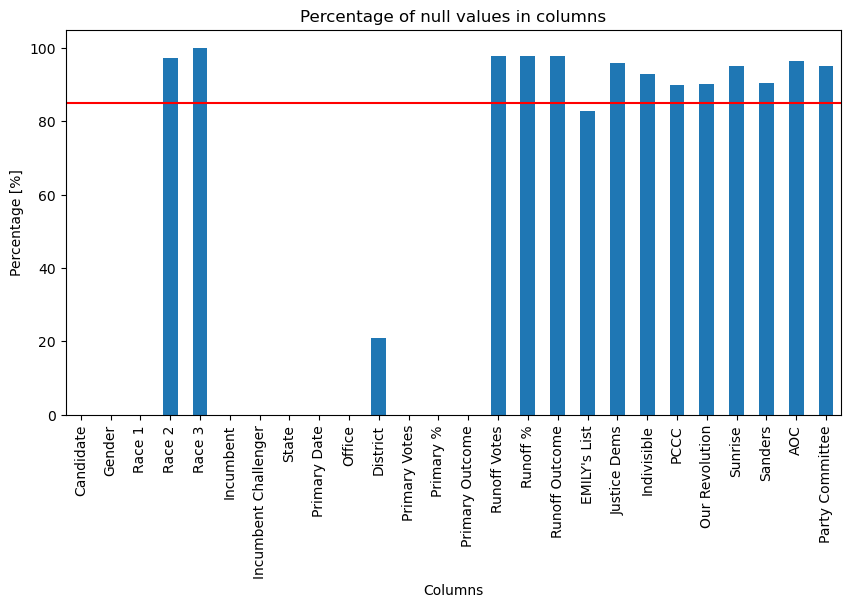

In [23]:
# Procenat NULL vrijednosti u koloni
null_percentages = (dem.isnull().sum() / len(dem)) * 100

# Na grafiku cemo nacrtati i horizontalnu liniju na y=85%
plt.figure(figsize=(10,5))
null_percentages.plot(kind='bar')
plt.title('Percentage of null values in columns')
plt.xlabel('Columns')
plt.ylabel('Percentage [%]')
plt.axhline(y=85, color='red')
plt.show()

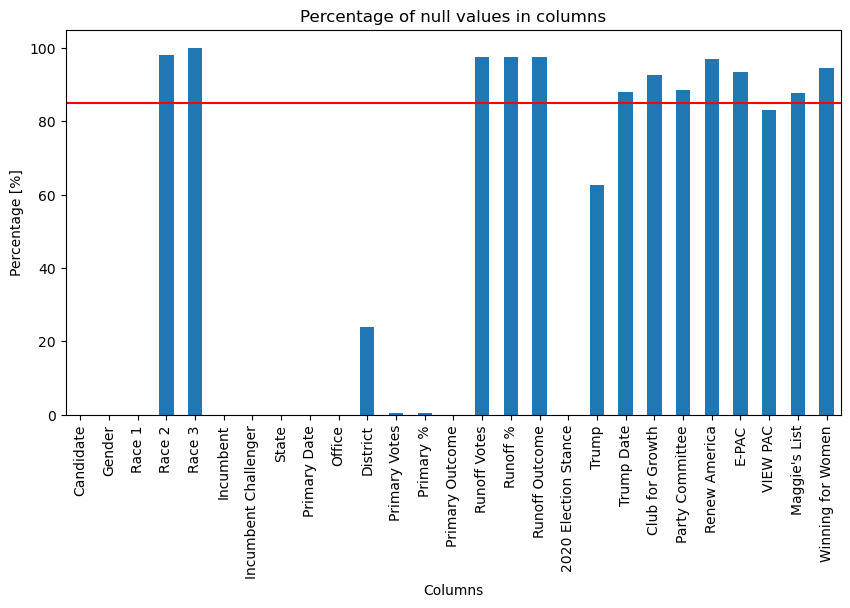

In [24]:
# Procenat NULL vrijednosti u koloni
null_percentages = (rep.isnull().sum() / len(rep)) * 100

# Na grafiku cemo nacrtati i horizontalnu liniju na y=85%
plt.figure(figsize=(10,5))
null_percentages.plot(kind='bar')
plt.title('Percentage of null values in columns')
plt.xlabel('Columns')
plt.ylabel('Percentage [%]')
plt.axhline(y=85, color='red')
plt.show()

In [25]:
for x in dem.columns:
    #print(dem[x])
    print("%s ima %s jedinstvenih vrijednosti" %(x, len(dem[x].unique())))

Candidate ima 1074 jedinstvenih vrijednosti
Gender ima 3 jedinstvenih vrijednosti
Race 1 ima 61 jedinstvenih vrijednosti
Race 2 ima 14 jedinstvenih vrijednosti
Race 3 ima 2 jedinstvenih vrijednosti
Incumbent ima 2 jedinstvenih vrijednosti
Incumbent Challenger ima 2 jedinstvenih vrijednosti
State ima 49 jedinstvenih vrijednosti
Primary Date ima 20 jedinstvenih vrijednosti
Office ima 4 jedinstvenih vrijednosti
District ima 54 jedinstvenih vrijednosti
Primary Votes ima 965 jedinstvenih vrijednosti
Primary % ima 101 jedinstvenih vrijednosti
Primary Outcome ima 3 jedinstvenih vrijednosti
Runoff Votes ima 25 jedinstvenih vrijednosti
Runoff % ima 20 jedinstvenih vrijednosti
Runoff Outcome ima 3 jedinstvenih vrijednosti
EMILY's List ima 5 jedinstvenih vrijednosti
Justice Dems ima 3 jedinstvenih vrijednosti
Indivisible ima 3 jedinstvenih vrijednosti
PCCC ima 3 jedinstvenih vrijednosti
Our Revolution ima 3 jedinstvenih vrijednosti
Sunrise ima 3 jedinstvenih vrijednosti
Sanders ima 4 jedinstvenih

In [26]:
for x in rep.columns:
    #print(dem[x])
    print("%s ima %s jedinstvenih vrijednosti" %(x, len(rep[x].unique())))

Candidate ima 1593 jedinstvenih vrijednosti
Gender ima 2 jedinstvenih vrijednosti
Race 1 ima 52 jedinstvenih vrijednosti
Race 2 ima 15 jedinstvenih vrijednosti
Race 3 ima 2 jedinstvenih vrijednosti
Incumbent ima 2 jedinstvenih vrijednosti
Incumbent Challenger ima 2 jedinstvenih vrijednosti
State ima 49 jedinstvenih vrijednosti
Primary Date ima 20 jedinstvenih vrijednosti
Office ima 4 jedinstvenih vrijednosti
District ima 54 jedinstvenih vrijednosti
Primary Votes ima 1486 jedinstvenih vrijednosti
Primary % ima 98 jedinstvenih vrijednosti
Primary Outcome ima 3 jedinstvenih vrijednosti
Runoff Votes ima 40 jedinstvenih vrijednosti
Runoff % ima 29 jedinstvenih vrijednosti
Runoff Outcome ima 3 jedinstvenih vrijednosti
2020 Election Stance ima 6 jedinstvenih vrijednosti
Trump ima 5 jedinstvenih vrijednosti
Trump Date ima 92 jedinstvenih vrijednosti
Club for Growth ima 3 jedinstvenih vrijednosti
Party Committee ima 5 jedinstvenih vrijednosti
Renew America ima 3 jedinstvenih vrijednosti
E-PAC i

****

**Primary Date**
jeste datum odrzavanja predizbora u kojima je kandidat ucestvovao

In [27]:
dem['Primary Date'].value_counts(ascending=False)

6/7/22     174
5/17/22    141
8/23/22    133
8/2/22     111
6/28/22     86
3/1/22      84
5/24/22     63
5/3/22      53
8/9/22      53
7/19/22     42
6/14/22     41
9/13/22     19
8/13/22     17
8/4/22      16
5/10/22     11
9/6/22      11
6/21/22     10
8/16/22     10
6/11/22      1
5/21/22      1
Name: Primary Date, dtype: int64

In [28]:
dem['Date_column'] = pd.to_datetime(dem['Primary Date'], format='%m/%d/%y')

In [29]:
rep['Date_column'] = pd.to_datetime(rep['Primary Date'], format='%m/%d/%y')

In [30]:
dem['day_of_week'] = dem['Date_column'].dt.day_name()

#Da izracunamo, koliko je dana proteklo od datuma odrzavanja predizbora do danas
dem ['now2date'] = (dt.datetime.now() - dem['Date_column']).dt.days

#Dobijanje broja mjeseca iz datuma
dem['Month'] = dem['Date_column'].dt.month

In [31]:
rep['day_of_week'] = rep['Date_column'].dt.day_name()

#Da izracunamo, koliko je dana proteklo od datuma odrzavanja predizbora do danas
rep ['now2date'] = (dt.datetime.now() - rep['Date_column']).dt.days

#Dobijanje broja mjeseca iz datuma
rep['Month'] = rep['Date_column'].dt.month

In [32]:
dem[['Primary Date', 'Date_column', 'day_of_week', 'now2date', 'Month']]

,Primary Date,Date_column,day_of_week,now2date,Month
0,3/1/22,2022-03-01,Tuesday,413,3
1,3/1/22,2022-03-01,Tuesday,413,3
2,3/1/22,2022-03-01,Tuesday,413,3
3,3/1/22,2022-03-01,Tuesday,413,3
4,3/1/22,2022-03-01,Tuesday,413,3
...,...,...,...,...,...
1072,9/13/22,2022-09-13,Tuesday,217,9
1073,9/13/22,2022-09-13,Tuesday,217,9
1074,9/13/22,2022-09-13,Tuesday,217,9
1075,9/13/22,2022-09-13,Tuesday,217,9


In [33]:
rep[['Primary Date', 'Date_column', 'day_of_week', 'now2date', 'Month']]

,Primary Date,Date_column,day_of_week,now2date,Month
0,3/1/22,2022-03-01,Tuesday,413,3
1,3/1/22,2022-03-01,Tuesday,413,3
2,3/1/22,2022-03-01,Tuesday,413,3
3,3/1/22,2022-03-01,Tuesday,413,3
4,3/1/22,2022-03-01,Tuesday,413,3
...,...,...,...,...,...
1594,9/13/22,2022-09-13,Tuesday,217,9
1595,9/13/22,2022-09-13,Tuesday,217,9
1596,9/13/22,2022-09-13,Tuesday,217,9
1597,9/13/22,2022-09-13,Tuesday,217,9


****

**Adding column with country code**

In [34]:
dem['State'].unique()

array(['Texas', 'Indiana', 'Ohio', 'West Virginia', 'Nebraska',
       'Kentucky', 'Oregon', 'Idaho', 'North Carolina', 'Pennsylvania',
       'Virginia', 'Alabama', 'Arkansas', 'Georgia', 'New Mexico',
       'Mississippi', 'Montana', 'Iowa', 'South Dakota', 'New Jersey',
       'California', 'Maine', 'Nevada', 'South Carolina', 'North Dakota',
       'Colorado', 'Illinois', 'New York', 'Oklahoma', 'Utah', 'Maryland',
       'Arizona', 'Kansas', 'Michigan', 'Missouri', 'Washington',
       'Tennessee', 'Connecticut', 'Minnesota', 'Vermont', 'Wisconsin',
       'Hawaii', 'Alaska', 'Wyoming', 'Florida', 'Massachusetts',
       'Delaware', 'New Hampshire', 'Rhode Island'], dtype=object)

In [35]:
def get_code(State):
    """ From country name get country code"""
    for country in pycountry.subdivisions:
        if country.name == State:
            code = country.code.split('-')[1]
        
    return code

dem['country_code'] = dem['State'].apply(get_code)
rep['country_code'] = rep['State'].apply(get_code)

In [36]:
dem['country_code'].unique()

array(['TX', 'IN', 'OH', 'WV', 'NE', 'KY', 'OR', 'ID', 'NC', 'PA', 'VA',
       'AL', 'AR', 'GA', 'NM', 'MS', 'MT', 'IA', 'SD', 'NJ', 'CA', 'ME',
       'NV', 'SC', 'ND', 'CO', 'IL', 'NY', 'OK', 'UT', 'MD', 'AZ', 'KS',
       'MI', 'MO', 'WA', 'TN', 'CT', 'MN', 'VT', 'WI', 'HI', 'AK', 'WY',
       'FD', 'MA', 'DE', 'NH', 'RI'], dtype=object)

In [37]:
rep['country_code'].unique()

array(['TX', 'IN', 'OH', 'VA', 'WV', 'NE', 'KY', 'OR', 'ID', 'NC', 'PA',
       'AL', 'AR', 'GA', 'NM', 'MS', 'MT', 'IA', 'SD', 'NJ', 'CA', 'ME',
       'NV', 'SC', 'ND', 'CO', 'IL', 'NY', 'OK', 'UT', 'MD', 'AZ', 'KS',
       'MI', 'MO', 'WA', 'TN', 'CT', 'MN', 'VT', 'WI', 'HI', 'AK', 'WY',
       'FD', 'MA', 'DE', 'NH', 'RI'], dtype=object)

In [38]:
dem['country_code'].value_counts()[:5]

CA    126
TX     84
NY     71
FD     66
NC     51
Name: country_code, dtype: int64

In [39]:
rep['country_code'].value_counts()[:5]

CA    152
TX    151
FD     94
NC     74
GA     62
Name: country_code, dtype: int64

****

In [40]:
dem.columns

Index(['Candidate', 'Gender', 'Race 1', 'Race 2', 'Race 3', 'Incumbent',
       'Incumbent Challenger', 'State', 'Primary Date', 'Office', 'District',
       'Primary Votes', 'Primary %', 'Primary Outcome', 'Runoff Votes',
       'Runoff %', 'Runoff Outcome', 'EMILY's List', 'Justice Dems',
       'Indivisible', 'PCCC', 'Our Revolution', 'Sunrise', 'Sanders', 'AOC',
       'Party Committee', 'Date_column', 'day_of_week', 'now2date', 'Month',
       'country_code'],
      dtype='object')

****

In [41]:
dem['Gender'].value_counts()

Male         697
Female       379
Nonbinary      1
Name: Gender, dtype: int64

In [42]:
rep['Gender'].value_counts()

Male      1261
Female     338
Name: Gender, dtype: int64

****

In [43]:
dem['Incumbent'].value_counts()

No     862
Yes    215
Name: Incumbent, dtype: int64

In [44]:
rep['Incumbent'].value_counts()

No     1383
Yes     216
Name: Incumbent, dtype: int64

****

In [45]:
dem['Incumbent Challenger'].value_counts()

No     882
Yes    195
Name: Incumbent Challenger, dtype: int64

In [46]:
rep['Incumbent Challenger'].value_counts()

No     1268
Yes     331
Name: Incumbent Challenger, dtype: int64

****

In [47]:
dem['Race 1'].unique()

array(['White', 'Black', 'Asian (Indian)', 'Latino', 'Latino (Mexican)',
       'Latino (Puerto Rican)', 'Unknown', 'Black (Eritrean)',
       'Asian (Bangladeshi)', 'White ', 'Latino (Peruvian)',
       'Middle Eastern (Saudi)', 'Latino (Ecuadorian)',
       'Black (Nigerian)', 'Native American (Saponi)',
       'White (Azerbaijani)', 'Middle Eastern (Palestinian)',
       'Latino (Venezuelan)', 'Native American (Comanche)', 'Asian',
       'Native American', 'Asian (Korean)', 'White (Polish)',
       'Latino (Cuban)', 'Latino (Colombian)', 'Asian (Japanese)',
       'Latino (Salvadoran)', 'Asian (Pakistani)',
       'Middle Eastern (Armenian)', 'Asian (Chinese)',
       'Middle Eastern (Iranian)', 'Latino (Guatemalan)',
       'Asian (Taiwanese)', 'Latino (Puerto Rican / Ecuadorian)',
       'Asian (Filipino)', 'Native American (Lakota)', 'Asian (Thai)',
       'Native American (Cherokee)', 'Native American (Creek / Yuchi)',
       'White (Albanian)', 'Latino (Dominican)', 'White (Be

In [48]:
def race(race1):
    """Getting a broader racial affiliation"""
    
    try:
        r = race1.split('(')[0].rstrip()
    except:
        r = race1
    return r
    
dem['Race'] = dem['Race 1'].apply(race)
rep['Race'] = rep['Race 1'].apply(race)

In [49]:
dem['Race'].unique()

array(['White', 'Black', 'Asian', 'Latino', 'Unknown', 'Middle Eastern',
       'Native American', 'Pacific Islander'], dtype=object)

In [50]:
rep['Race'].unique()

array(['Asian', 'White', 'Black', 'Unknown', 'Latino', 'Middle Eastern',
       'Native American', 'Pacific Islander'], dtype=object)

In [51]:
dem['Race'].value_counts(ascending=False)

White               576
Black               298
Latino              109
Asian                56
Unknown              17
Middle Eastern       11
Native American       9
Pacific Islander      1
Name: Race, dtype: int64

In [52]:
rep['Race'].value_counts(ascending=False)

White               1258
Black                122
Latino                97
Asian                 50
Unknown               49
Middle Eastern        14
Pacific Islander       5
Native American        4
Name: Race, dtype: int64

****

In [53]:
dem['Office'].value_counts(ascending=False)

Representative              852
Senator                     114
Governor                    107
Senator (unexpired term)      4
Name: Office, dtype: int64

****

In [54]:
dem['District'].value_counts(ascending=False)[:5]

1     86
2     77
4     67
3     66
10    50
Name: District, dtype: int64

In [55]:
rep['District'].value_counts(ascending=False)[:5]

2    134
1    115
6     87
4     85
3     84
Name: District, dtype: int64

****

In [56]:
len(dem['Runoff %'].notnull())

1077

In [57]:
len(dem['Runoff %'][dem['Runoff %'].notnull()])

24

In [58]:
dem['Runoff %'].count() #output je broj non-nan vrijednoti u koloni

24

In [59]:
rep['Runoff %'].count() #output je broj non-nan vrijednoti u koloni

39

In [60]:
rep['Runoff Outcome'].value_counts()

Lost    20
Won     19
Name: Runoff Outcome, dtype: int64

In [61]:
dem['Runoff Outcome'].value_counts()

Lost    12
Won     12
Name: Runoff Outcome, dtype: int64

In [62]:
rep[rep['Runoff Outcome']=='Won']['Primary Votes'].str.replace(',', '').astype(int).describe()

count        19.000000
mean      36979.789474
std       70382.293452
min        2900.000000
25%        6225.000000
50%       10579.000000
75%       26208.000000
max      289425.000000
Name: Primary Votes, dtype: float64

In [63]:
dem_desc = dem[dem['Runoff Outcome']=='Won']['Primary Votes'].str.replace(',', '').astype(int).describe()
dem_desc=pd.DataFrame(data=dem_desc)
dem_desc.rename(columns={'Primary Votes':'Democratic Primary Votes'}, inplace=True)

In [64]:
rep_desc = rep[rep['Runoff Outcome']=='Won']['Primary Votes'].str.replace(',', '').astype(int).describe()
rep_desc=pd.DataFrame(data=rep_desc)
rep_desc.rename(columns={'Primary Votes':'Republican Primary Votes'}, inplace=True)

In [65]:
rep_desc.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [66]:
rd_won_desc = rep_desc.merge(dem_desc, on=dem_desc.index)
rd_won_desc.set_index('key_0', inplace=True)
rd_won_desc

,Republican Primary Votes,Democratic Primary Votes
key_0,,
count,19.000000,12.000000
mean,36979.789474,25786.250000
std,70382.293452,20562.073251
min,2900.000000,6570.000000
25%,6225.000000,10774.750000
50%,10579.000000,16861.000000
75%,26208.000000,34346.250000
max,289425.000000,60691.000000


****

In [67]:
EL = dem[dem['EMILY\'s List']=='Yes']
EL['Gender'].value_counts()

Female    64
Name: Gender, dtype: int64

In [68]:
EL['State'].value_counts()[:5]

New York          6
Illinois          5
Michigan          5
Iowa              5
North Carolina    3
Name: State, dtype: int64

In [69]:
endorsement = dem.columns[17:26]  # Lista organizacija

sum_yes = 0 # Na kraju ce predstavljati koliko puta su kandidati podrzani
sum_no  = 0
for edrsmnt in endorsement:
    name = str(edrsmnt.split(' ')[0][:4])
    
    print(name)
    
    globals()['%s_yes' %name] = dem[dem[edrsmnt]=='Yes']
    globals()['%s_no' %name] = dem[dem[edrsmnt]=='No']
    
    sum_yes = sum_yes + len(globals()['%s_yes' %name])
    sum_no  = sum_no + len(globals()['%s_no' %name])

EMIL
Just
Indi
PCCC
Our
Sunr
Sand
AOC
Part


In [70]:
print('Ukupan broj podrzanih demoktatskih kandidata sum_yes = %s i suprotno sum_no = %s' %(sum_yes, sum_no))

Ukupan broj podrzanih demoktatskih kandidata sum_yes = 226 i suprotno sum_no = 537


In [71]:
rep.columns[17:]

Index(['2020 Election Stance', 'Trump', 'Trump Date', 'Club for Growth',
       'Party Committee', 'Renew America', 'E-PAC', 'VIEW PAC',
       'Maggie's List', 'Winning for Women', 'Date_column', 'day_of_week',
       'now2date', 'Month', 'country_code', 'Race'],
      dtype='object')

In [72]:
# za republikance

endorsement = rep.columns[17:]  # Lista organizacija

sum_yes = 0 # Na kraju ce predstavljati koliko puta su kandidati podrzani
sum_no  = 0
for edrsmnt in endorsement:
    name = str(edrsmnt.split(' ')[0][:4])
    
    print(name)
    
    globals()['%s_yes' %name] = rep[rep[edrsmnt]=='Yes']
    globals()['%s_no' %name] = rep[rep[edrsmnt]=='No']
    
    sum_yes = sum_yes + len(globals()['%s_yes' %name])
    sum_no  = sum_no + len(globals()['%s_no' %name])

2020
Trum
Trum
Club
Part
Rene
E-PA
VIEW
Magg
Winn
Date
day_
now2
Mont
coun
Race


In [73]:
print('Ukupan broj podrzanih republikanskih kandidata sum_yes = %s i suprotno sum_no = %s' %(sum_yes, sum_no))

Ukupan broj podrzanih republikanskih kandidata sum_yes = 418 i suprotno sum_no = 1174


****

## g s p r e a d

In [74]:
scope = ['https://googleapis.com/auth/sreadsheets', 'https://googleapis.com/auth/drive']
credentials = ServiceAccountCredentials.from_json_keyfile_name('/home/aleksandar/Desktop/data_science & machine_learning/DATA_SCIENCE_KURS_COINIS/zavrsni_projekat/dev-labs-383116-d862af2b321b.json')

In [75]:
client = gspread.authorize(credentials)

sheet_d = client.create('Democratic')
sheet_r = client.create('Republican')

sheet_d.share('zecevic050@gmail.com', perm_type='user', role='writer')
sheet_r.share('zecevic050@gmail.com', perm_type='user', role='writer')

sheetd = client.open('Democratic').sheet1
sheetr = client.open('Republican').sheet1

In [76]:
dem.columns

Index(['Candidate', 'Gender', 'Race 1', 'Race 2', 'Race 3', 'Incumbent',
       'Incumbent Challenger', 'State', 'Primary Date', 'Office', 'District',
       'Primary Votes', 'Primary %', 'Primary Outcome', 'Runoff Votes',
       'Runoff %', 'Runoff Outcome', 'EMILY's List', 'Justice Dems',
       'Indivisible', 'PCCC', 'Our Revolution', 'Sunrise', 'Sanders', 'AOC',
       'Party Committee', 'Date_column', 'day_of_week', 'now2date', 'Month',
       'country_code', 'Race'],
      dtype='object')

In [77]:
dem['Date_column'] = pd.to_datetime(dem['Date_column']).dt.strftime('%Y-%m-%d')

In [78]:
rep['Date_column'] = pd.to_datetime(rep['Date_column']).dt.strftime('%Y-%m-%d')

In [79]:
sheetd.update([dem.columns.tolist()] + dem.values.tolist())

{'spreadsheetId': '1FDPS1GZnE7UsNpwMN1vMnVkykhFWLN98bLoJzbPOmOQ',
 'updatedRange': 'Sheet1!A1:AF1078',
 'updatedRows': 1078,
 'updatedColumns': 32,
 'updatedCells': 20060}

In [80]:
sheetr.update([rep.columns.tolist()] + rep.values.tolist())

{'spreadsheetId': '1c_mrzi8vRRnJnwdllZeE6g07vQSCtRq8ToKNh0C6lys',
 'updatedRange': 'Sheet1!A1:AG1600',
 'updatedRows': 1600,
 'updatedColumns': 33,
 'updatedCells': 31960}

In [81]:
sheet = client.open('Democratic').sheet1

# Detektovanje maksimalnog reda u tabeli
max_row = len(sheet.get_all_values())
max_row

1078

In [82]:
def upis_u_sheet(df, sheet):
    """ Funkcija koja dodaje 4x DF u sheet, random redosledom redova"""

    df4x = pd.concat([df]*4, ignore_index=True)
    random_rows = df4x.sample(frac=1).reset_index(drop=True)
    
    rows = random_rows.values.tolist()
    
    for row in rows:
        sheet.append_row(row)

In [84]:
upis_u_sheet(dem, sheet1)

****

# V I Z U A L I Z A C I J A

In [85]:
demm = dem['Gender'].value_counts()
repp = rep['Gender'].value_counts()

repp = pd.DataFrame(repp)
demm = pd.DataFrame(demm)

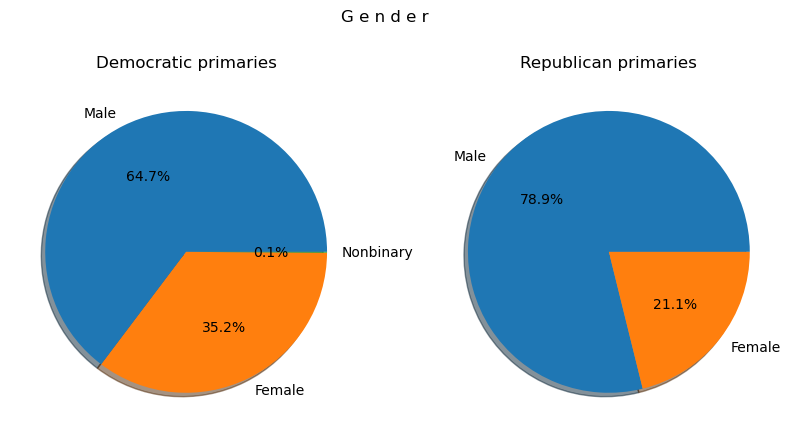

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(demm['Gender'], labels=demm.index, autopct='%1.1f%%', shadow=True)
ax1.set_title('Democratic primaries')

ax2.pie(repp['Gender'], labels=repp.index, autopct='%1.1f%%', shadow=True)
ax2.set_title('Republican primaries')

fig.suptitle('G e n d e r')

plt.savefig('Pie_Gender.png', dpi=250, facecolor='white', bbox_inches='tight')
plt.show()

In [87]:
demRace = pd.DataFrame(dem['Race'].value_counts())
repRace = pd.DataFrame(rep['Race'].value_counts())

demRace['primaries'] = np.full((len(demRace)), 'Democratic')
repRace['primaries'] = np.full((len(repRace)), 'Republican')

df = pd.concat([repRace, demRace])
df

,Race,primaries
White,1258,Republican
Black,122,Republican
Latino,97,Republican
Asian,50,Republican
Unknown,49,Republican
Middle Eastern,14,Republican
Pacific Islander,5,Republican
Native American,4,Republican
White,576,Democratic
Black,298,Democratic


<function matplotlib.pyplot.show(close=None, block=None)>

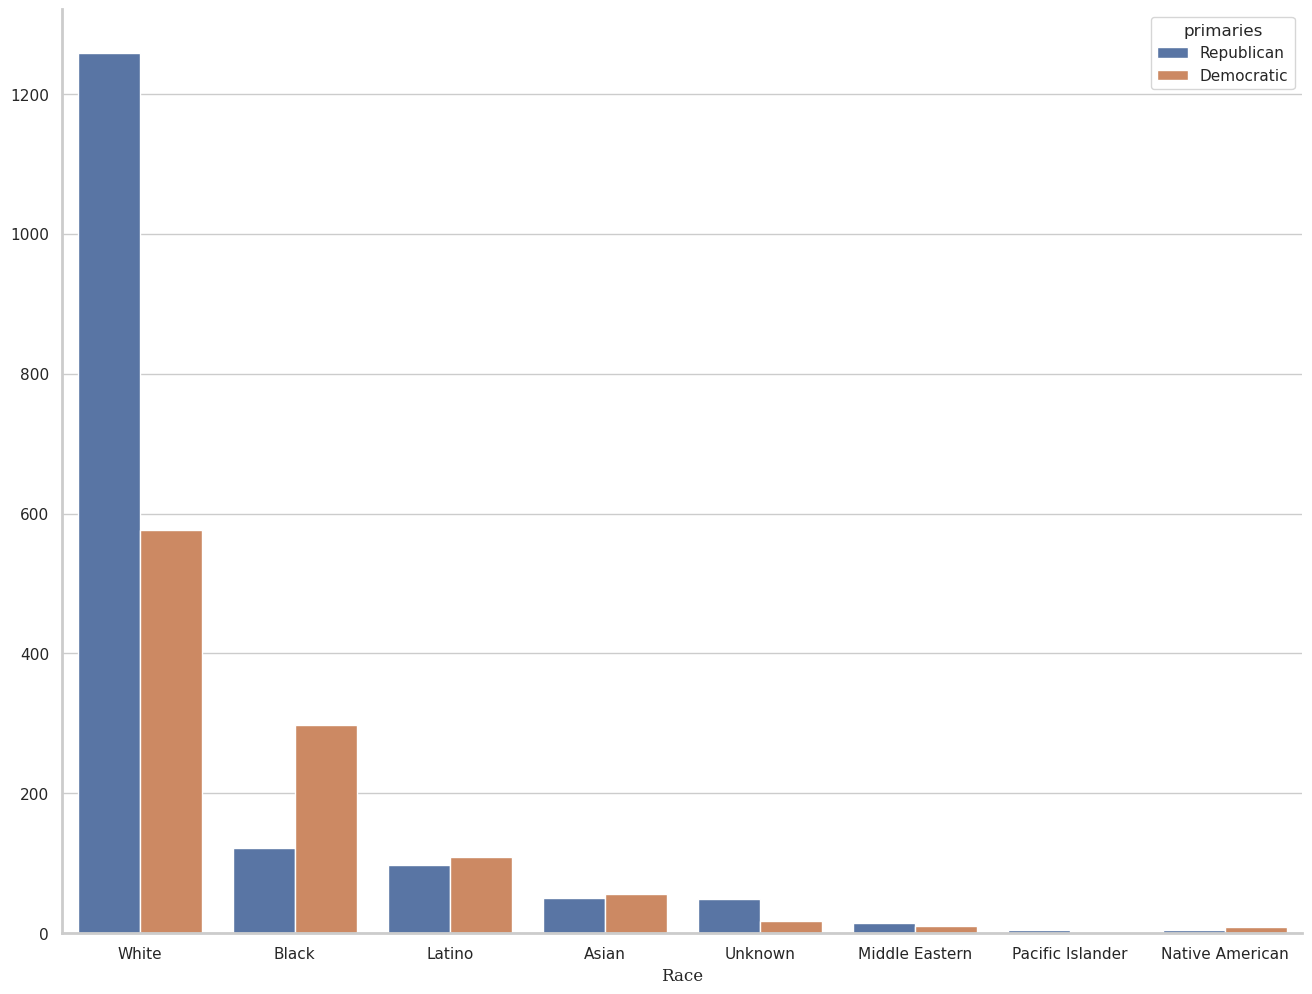

In [88]:
sns.set_theme(style='whitegrid')

fig, ax = plt.subplots(figsize=(16,12))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

label_font = {'fontname':'serif','size':12}
sns.barplot(x=df.index, y=df['Race'], hue=df.primaries, data=df)

plt.xlabel('Race', **label_font)
plt.ylabel('')

plt.savefig('Race_bar.png', bbox_inches = 'tight', dpi=250)
plt.show

In [89]:
demRace = pd.DataFrame(dem['State'].value_counts())
repRace = pd.DataFrame(rep['State'].value_counts())

demRace['primaries'] = np.full((len(demRace)), 'Democratic')
repRace['primaries'] = np.full((len(repRace)), 'Republican')

df = pd.concat([repRace, demRace])
df = df[df['State']>20]

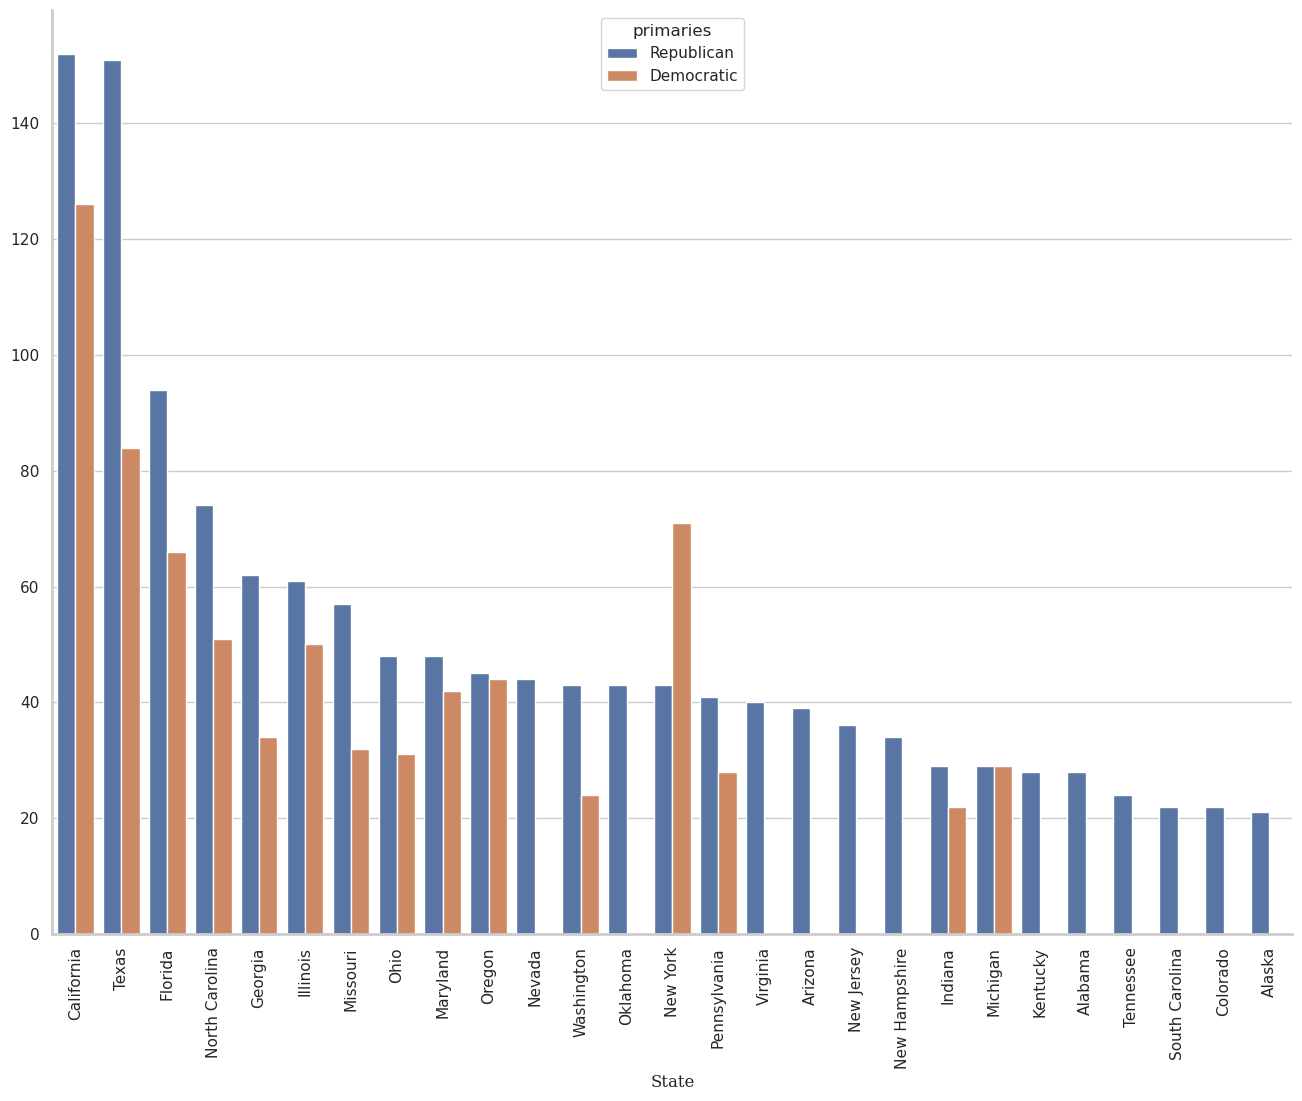

In [90]:
sns.set_theme(style='whitegrid')

fig, ax = plt.subplots(figsize=(16,12))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

label_font = {'fontname':'serif','size':12}
sns.barplot(x=df.index, y=df['State'], hue=df.primaries, data=df)

plt.xlabel('State', **label_font)
plt.xticks(rotation=90)
plt.ylabel('')

plt.savefig('State_bar.png', bbox_inches = 'tight', dpi=250)
plt.show()

In [91]:
demRace = pd.DataFrame(dem['Office'].value_counts())
repRace = pd.DataFrame(rep['Office'].value_counts())

demRace['primaries'] = np.full((len(demRace)), 'Democratic')
repRace['primaries'] = np.full((len(repRace)), 'Republican')

df = pd.concat([repRace, demRace])
df

,Office,primaries
Representative,1214,Republican
Governor,187,Republican
Senator,181,Republican
Senator (unexpired term),17,Republican
Representative,852,Democratic
Senator,114,Democratic
Governor,107,Democratic
Senator (unexpired term),4,Democratic


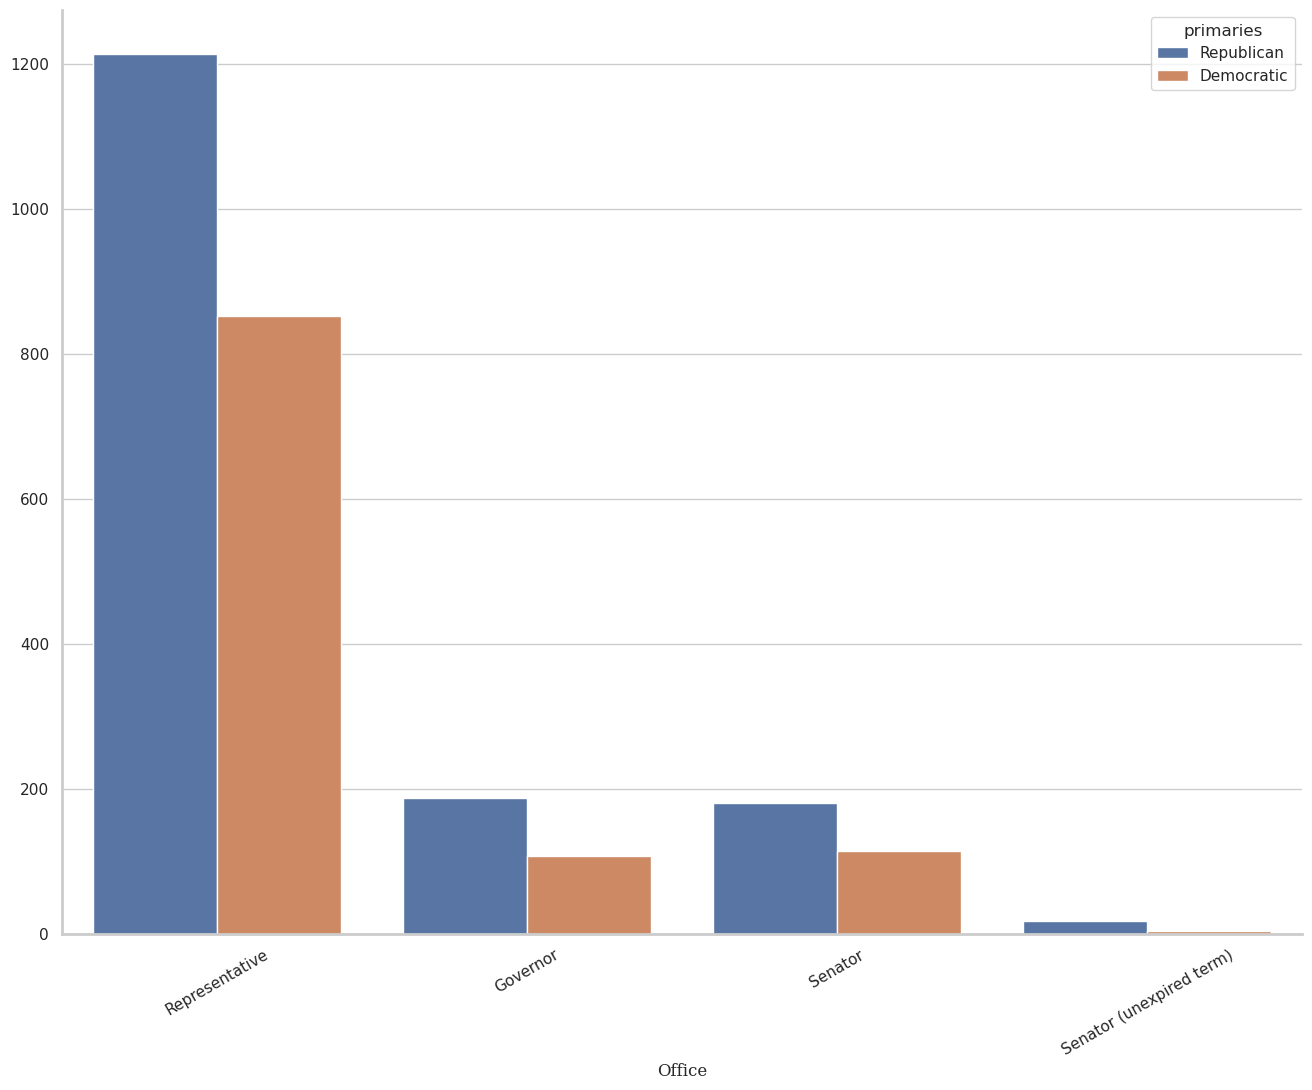

In [92]:
sns.set_theme(style='whitegrid')

fig, ax = plt.subplots(figsize=(16,12))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

label_font = {'fontname':'serif','size':12}
sns.barplot(x=df.index, y=df['Office'], hue=df.primaries, data=df)

plt.xlabel('Office', **label_font)
plt.xticks(rotation=30)
plt.ylabel('')

plt.savefig('Office_bar.png', bbox_inches = 'tight', dpi=250)
plt.show()

In [93]:
dem['Date_column'] = pd.to_datetime(dem['Date_column'])
rep['Date_column'] = pd.to_datetime(rep['Date_column'])

demRace = pd.DataFrame(dem['Date_column'].value_counts())
repRace = pd.DataFrame(rep['Date_column'].value_counts())

demRace['primaries'] = np.full((len(demRace)), 'Democratic')
repRace['primaries'] = np.full((len(repRace)), 'Republican')

df = pd.concat([repRace, demRace])
df

,Date_column,primaries
2022-06-07,238,Republican
2022-05-17,207,Republican
2022-08-02,177,Republican
2022-03-01,151,Republican
2022-06-28,143,Republican
2022-08-23,132,Republican
2022-05-24,104,Republican
2022-05-03,77,Republican
2022-06-14,73,Republican
2022-08-09,56,Republican


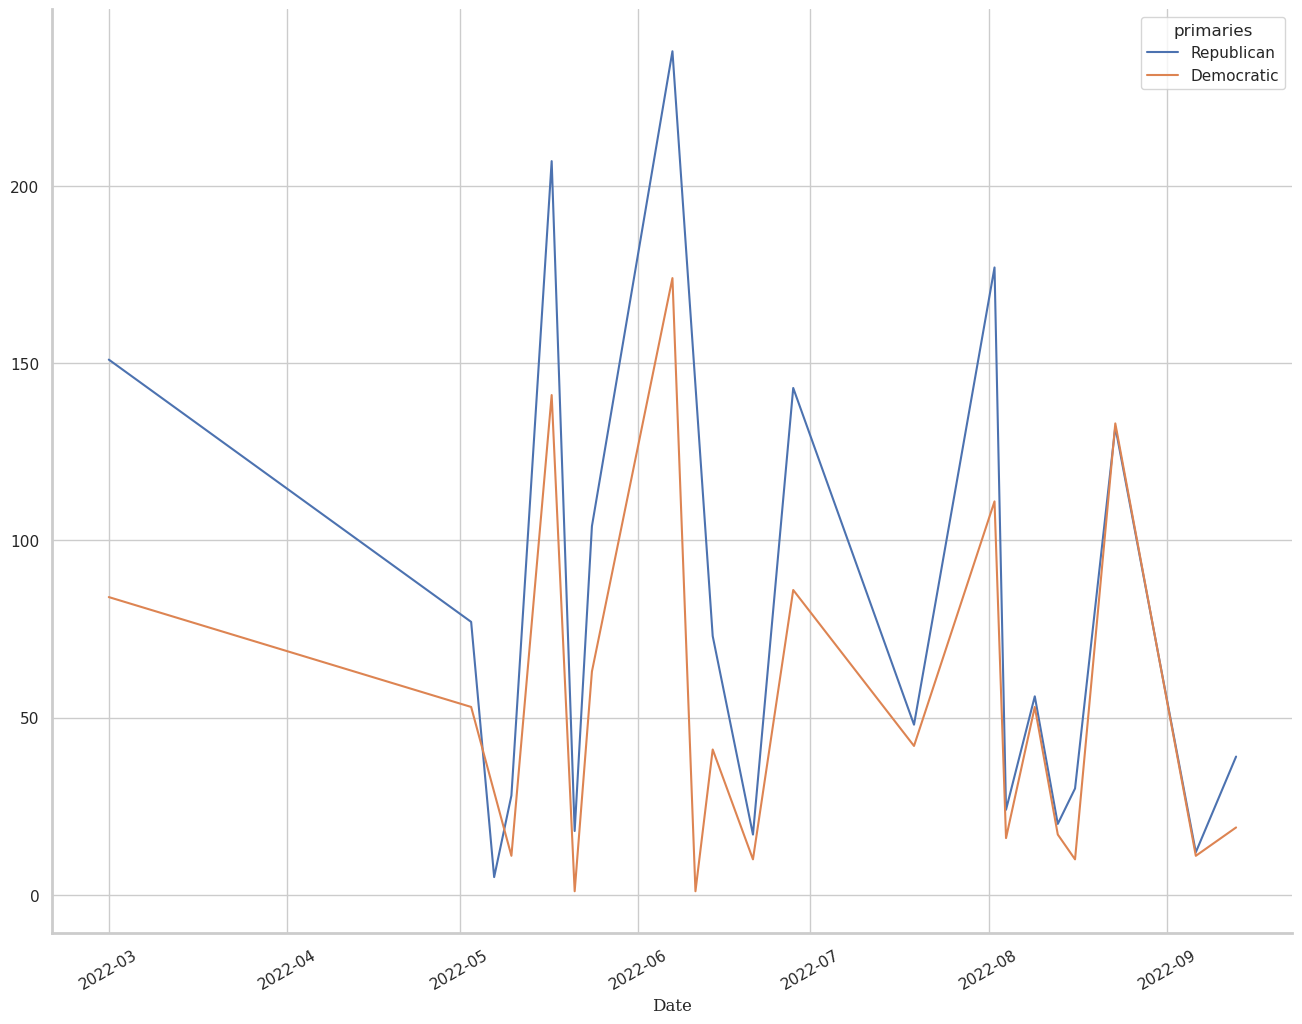

In [94]:
sns.set_theme(style='whitegrid')

fig, ax = plt.subplots(figsize=(16,12))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

label_font = {'fontname':'serif','size':12}
sns.lineplot(x=df.index, y=df['Date_column'], hue=df.primaries, data=df)

plt.xlabel('Date', **label_font)
plt.xticks(rotation=30)
plt.ylabel('')

plt.savefig('Date_line.png', bbox_inches = 'tight', dpi=250)
plt.show()

****

In [95]:
!ls

Date_line.png	Primary_elections.pdf  requirements.txt  zavrsni_projekat.ipynb
Office_bar.png	primary-project-2022   State_bar.png	 zavrsni_projekat.zip
Pie_Gender.png	Race_bar.png	       zavrsni_projekat


# E M A I L 
reporting

In [96]:
import email
import smtplib
import pandas as pd
import getpass, imaplib
from email import encoders 
from email.mime.base import MIMEBase
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from datetime import date, datetime, timedelta
from email.mime.application import MIMEApplication
import os

In [97]:
!ls

Date_line.png	Primary_elections.pdf  requirements.txt  zavrsni_projekat.ipynb
Office_bar.png	primary-project-2022   State_bar.png	 zavrsni_projekat.zip
Pie_Gender.png	Race_bar.png	       zavrsni_projekat


In [100]:
def send_email(subject, body, to_email, attachment_path=None):
    """Sends an email message with an optional attachment"""
    
    # Set up the email message
    msg = MIMEMultipart()
    #msg['From'] = 'sender@example.com'
    msg['To'] = to_email
    msg['Subject'] = subject

    # Add body text to the message
    msg.attach(MIMEText(body, 'plain'))

    # Add attachment to the message, if specified
    if attachment_path:
        attachment = open(attachment_path, "rb")
        part = MIMEBase('application', 'octet-stream')
        part.set_payload(attachment.read())
        encoders.encode_base64(part)
        part.add_header('Content-Disposition', "attachment; filename= %s" % attachment_path)
        msg.attach(part)

    # Log in to the SMTP server
    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.starttls()
    server.login('zecevic050@gmail.com', email_psswd)

    # Send the message
    text = msg.as_string()
    server.sendmail('zecevic050@gmail.com', to_email, text)
    server.quit()

In [101]:
path = 'zavrsni_projekat.zip'
subject = 'Zavrsni projekat'
body = 'Folder sa graficima analize dataseta "Primary Election 2022" i pdf izvjestajem'

send_email(subject, body, to_email='aleksandar.zecevic@meteo.co.me', attachment_path=path)
send_email(subject, body, to_email='zecevic050@gmail.com', attachment_path=path)

In [102]:
def download_file():
    imapSession = imaplib.IMAP4_SSL('imap.gmail.com')
    typ, accountDetails = imapSession.login('zecevic050@gmail.com', email_psswd)
    if typ != 'OK':
        print('Not able to sign in!')
        raise

    imapSession.select('Inbox')
    typ, data = imapSession.search(None, f'SUBJECT "{subject}"') #Example 1
    #typ, data = imapSession.search(None,"(UNSEEN)") #Example 2

    if typ != 'OK':
        print('Error searching Inbox.')
        raise

    msg_num = str((b''.join(data))).split(" ")
    new_items = [word.replace("'","").replace("b","") for word in msg_num]
    if new_items[0] != "":
        for msgId in new_items:
            typ, messageParts = imapSession.fetch(msgId, '(RFC822)')
            print(msgId)
            if typ != 'OK':
                print('Error fetching mail.')
                raise
            emailBody = messageParts[0][1]
            # converts byte literal to string removing b''
            raw_email_string = emailBody.decode('utf-8')
            mail = email.message_from_string(raw_email_string)
            for part in mail.walk():
                if part.get_content_maintype() == 'multipart':
                    continue
                if part.get('Content-Disposition') is None:
                    continue
        fileName = 'zavrsni_projekat.zip'
        if bool(fileName):
            
            filePath = os.path.join('/home/aleksandar/Downloads/', 'attachments', fileName)
            if os.path.isfile(filePath):
                raise Exception(f"{fileName} already exists! This file can't be downloaded again. ")
                #os.remove(filePath)
            os.makedirs(os.path.dirname(filePath), exist_ok=True) 
            fp = open(filePath, 'wb')
            fp.write(part.get_payload(decode=True))
            print(fp)
            fp.close()
 

In [103]:
download_file()

967
971


Exception: zavrsni_projekat.zip already exists! This file can't be downloaded again. 

In [ ]:
#conda list -e > requirements.txt

# K R A J